In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
def scatterCluster(clusters,centroids=[], xLabel="Feature 1", yLabel="Feature 2", title= "kMeans Clusters & Cluster Centers"):
    colors = ["blue", "red", "green","grey","yellow","brown","orange","purple"]
    for i,cluster in enumerate(clusters):
        #print(len(cluster),cluster)
        plt.scatter(np.array(cluster)[:,0], np.array(cluster)[:,1],c =colors[i%8], s=0.1)
    if len(centroids) > 0:
        plt.scatter(np.array(centroids)[:,0], np.array(centroids)[:,1],c = "black", marker="x")    
    plt.xlabel(xLabel)
    plt.ylabel(yLabel) 
    plt.title(title)
    plt.tight_layout() 
    plt.show()

In [3]:
def scatterScikitsResult(labels,centroids,data, xLabel="Feature 1", yLabel="Feature 2", title= "Scikit Result"):
    clusters = [ [] for i in range(len(centroids))]
    for i,point in enumerate(data):
        clusters[labels[i]].append(point)
    colors = ["blue", "red", "green","grey","yellow","brown","orange","purple"]
    for i,cluster in enumerate(clusters):
        plt.scatter(np.array(cluster)[:,0], np.array(cluster)[:,1],c =colors[i%8], s=0.1)
    plt.scatter(np.array(centroids)[:,0], np.array(centroids)[:,1],c = "black", marker="x")    
    plt.xlabel(xLabel)
    plt.ylabel(yLabel) 
    plt.title(title)
    plt.tight_layout() 
    plt.show()

In [4]:
def plotValues(data, xAxis=[], xLabel="", yLabel="",title=""):
    plt.xlabel(xLabel)
    plt.ylabel(yLabel) 
    plt.title(title) 
    if len(xAxis) > 0:
        plt.plot(xAxis, data, '-ok')
    else:
        plt.plot(data, '-ok')

In [5]:
def clusterize(centroids, data, k):
    clusters = [ [] for i in range(k)]
    for dataPoint in data:
        cluster_index=-1
        distance = float('inf')
        for c_index, cluster_center in enumerate(centroids):
            distance_to_center = calculateDistance(cluster_center, dataPoint)
            if(distance_to_center<distance):
                distance = distance_to_center
                cluster_index = c_index     
        clusters[cluster_index].append(np.array(dataPoint))
    return clusters    

In [6]:
def calculateDistance(pointA, pointB):
    substract= np.subtract(pointA, pointB)
    return np.linalg.norm(substract)

In [7]:
def calculateCentroids(clusters):
    newCentroids = []
    for cluster in clusters:
        newCentroids.append(np.mean(cluster,axis=0))
    return newCentroids    

In [8]:
def kMeans(kValue, data):
    lossValues = []
    iteration_clusters = []
    iteration_centroids = []
    initial_centroids = np.random.rand(kValue,2)
    clusters = clusterize(initial_centroids, data, kValue)
    iteration_clusters.append(clusters)
    iteration_centroids.append(initial_centroids)
    #scatterCluster(clusters,initial_centroids)
    stop= False
    previousLoss = float('inf')
    iteration = 0
    thresold = 0.0001
    while not stop:
        iteration += 1
        newCentroids = calculateCentroids(clusters)
        clusters = clusterize(newCentroids, data, kValue)
        currentLoss = 0
        for c in clusters:
            clusterVar = clusterVariance(c)
            currentLoss += clusterVar
        if((previousLoss - currentLoss) < thresold):
            stop = True
        lossValues.append(currentLoss)
        previousLoss = currentLoss
        iteration_clusters.append(clusters)
        iteration_centroids.append(newCentroids)
    return iteration_clusters, iteration_centroids, lossValues   

In [9]:
def clusterVariance(data):
    center = np.mean(data,axis=0)
    variance = 0
    for dataPoint in data:
        distanceSquare = np.square(calculateDistance(dataPoint, center))
        variance += distanceSquare
    return variance

In [10]:
def randomCluster(clusterNumber):
    data = np.random.normal(sample_size,dimension)

In [11]:
def calculate_ai(point,cluster):
    a_i=0
    for i,_point in cluster:
        a_i += calculateDistance(_point,point)
    return a_i/len(cluster)

In [12]:
def calculate_bi(point,cluster_index,clusters):
    b_i=0
    number_of_distance = 0
    for i,cluster in enumerate(clusters):
        if i != cluster_index:
            number_of_distance += len(cluster) 
            for _point in cluster:
                b_i += calculateDistance(_point,point)
    return b_i/ number_of_distance

In [13]:
def silhouetteCoef(clusters):
    s_i_List= []
    for i,cluster in enumerate(clusters):
        for index,point in enumerate(cluster):
            a_i = calculate_ai(point,cluster);
            b_i = calculate_bi(point,int(i),clusters);
            s_i = (b_i - a_i)/ max(b_i, a_i)
            s_i_List.append(s_i)  
    return sum(s_i_List) / len(s_i_List)

In [14]:
def generate3ClusterData(cluster_size):
    x =  np.random.normal(0.0,0.2,size=cluster_size)
    y =  np.random.normal(0.0,0.3,size=cluster_size)
    data1 = np.vstack((x, y)).T 
    x2 =  np.random.normal(1.0,0.2,size=cluster_size)
    y2 =  np.random.normal(1.0,0.2,size=cluster_size)
    data2 = np.vstack((x2, y2)).T
    x3 =  np.random.normal(-1.0,0.2,size=cluster_size)
    y3 =  np.random.normal(1.0,0.2,size=cluster_size)
    data3 = np.vstack((x3, y3)).T 
    return np.concatenate((np.concatenate((data1, data2)),data3))

In [15]:
def findBestK(data, max_Kvalue):
    lossValues = []
    siCoeff= []
    best_K_Value = 0
    maxSiCoeff = -1
    for i in range(1,max_Kvalue+1):
        print("Calculating kMeans with k: ", i)
        cluster_history, centroid_history, lossData = kMeans(i,data)
        lossValues.append(lossData[-1])
        if i > 1:
            siValue = silhouetteCoef(cluster_history[-1])
            if siValue > maxSiCoeff:
                maxSiCoeff = siValue
                best_K_Value = i
            siCoeff.append(siValue)
    print("Calculated best K-Value: ", best_K_Value)
    return lossValues, best_K_Value, siCoeff

## Define Cluster and Data Parameters

In [16]:
cluster_size = 500
number_of_cluster = 3
sample_size = cluster_size * number_of_cluster
dimension = 2
max_K_val = 6
k=3

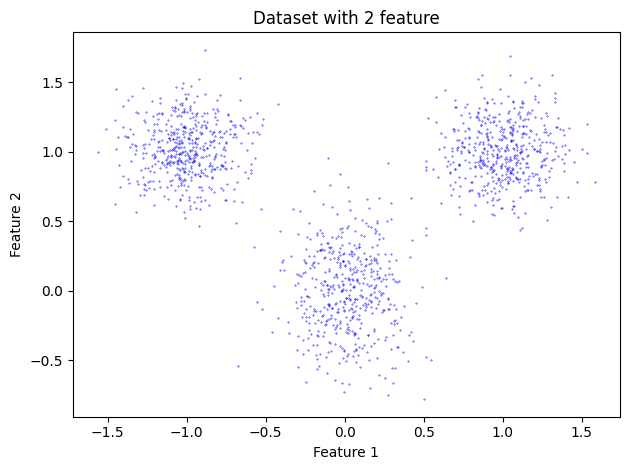

In [17]:
data = generate3ClusterData(cluster_size)
scatterCluster([data],title="Dataset with 2 feature")

### Apply k-Means Algorithm

In [18]:
cluster_history, centroid_history, lossData = kMeans(k, data)

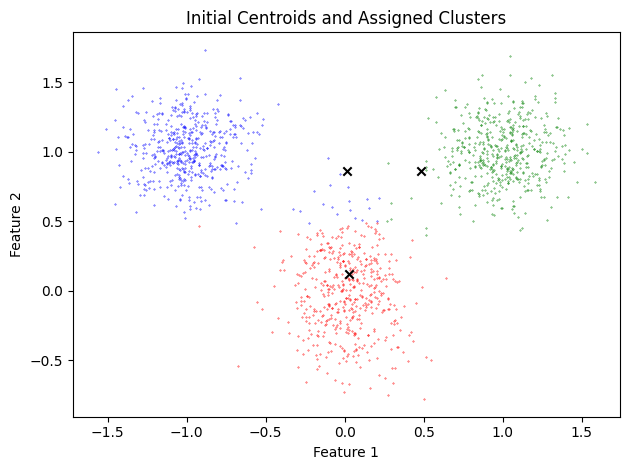

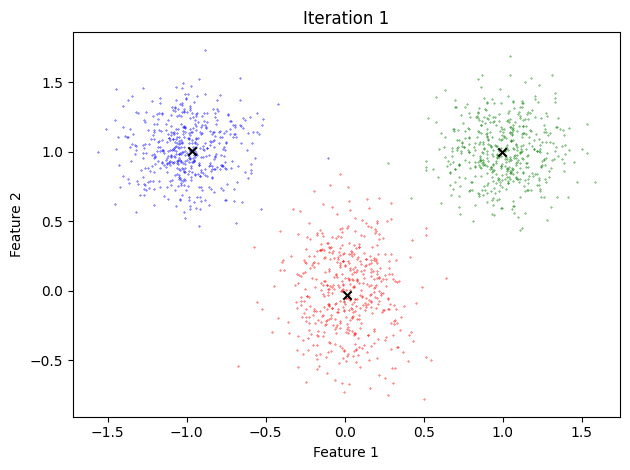

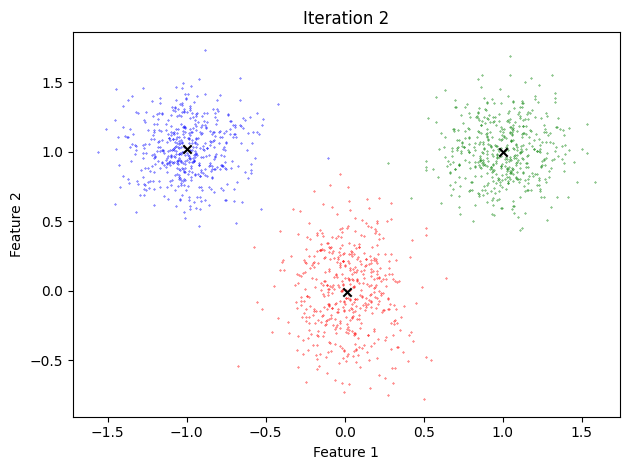

IndexError: list index out of range

In [19]:
scatterCluster(cluster_history[0], centroid_history[0], title="Initial Centroids and Assigned Clusters")
scatterCluster(cluster_history[1], centroid_history[1], title="Iteration 1")
scatterCluster(cluster_history[2], centroid_history[2], title="Iteration 2")
scatterCluster(cluster_history[3], centroid_history[3], title="Iteration 3")
scatterCluster(cluster_history[-1], centroid_history[-1], title="Result")

In [ ]:
plotValues(data=lossData, xLabel="# of iteration", yLabel="Loss Value", title="K = " + str(k))

## Scikit-Learn k-Means Algorithm

In [ ]:
km = KMeans(
    n_clusters=k, init=centroid_history[0],
    n_init=1, max_iter=300,
    tol=0.0001,
    random_state=0
)
km.fit_predict(data)

In [ ]:
scatterCluster(cluster_history[-1], centroid_history[-1], title='kMeans Implementation Result')
scatterScikitsResult(km.labels_, km.cluster_centers_,data)

## Finding Best K-Value

In [ ]:
allLosses, bestK, averageSiCoeff = findBestK(data, max_Kvalue= max_K_val)

In [ ]:
plotValues(data=allLosses, xAxis=[int(x+1) for x in range(max_K_val)],xLabel="K Value", yLabel="Loss Value",title="K vs Loss Value")

In [ ]:
plotValues(data=averageSiCoeff, xAxis=[int(x) for x in range(2,max_K_val+1)],xLabel="K Value", yLabel="Silhouette Coeff",title="K vs Silhouette Value")

## kMeans with Diffucult Dataset

In [ ]:
cluster_size = 500
k=3

In [ ]:
def circle_points(r, n):
    circles = []
    for r, n in zip(r, n):
        t = np.linspace(0, 2*np.pi, n, endpoint=False)
        x = r * np.cos(t) 
        y = r * np.sin(t)
        circles.append(np.c_[x, y])
    return circles

### Generate Circular Data

In [ ]:
r = [5, 1, 2]
n = [cluster_size, cluster_size, cluster_size]
circles = circle_points(r, n)

In [ ]:
fig, ax = plt.subplots()
for circle in circles:
    ax.scatter(circle[:, 0], circle[:, 1],s=1)
plt.title("3 Cluster Non Convex Data")
plt.xlabel("Fature 1")
plt.ylabel("Fature 2")
ax.set_aspect('equal')
plt.show()

In [ ]:
dataCircle = np.concatenate((np.concatenate((circles[0], circles[1])),circles[2]))

In [ ]:
scatterCluster([dataCircle], title="Non Convex Data without Labels")

### Apply k-Means Algorithm

In [ ]:
cluster_history, centroid_history, lossData = kMeans(k, dataCircle)

In [ ]:
scatterCluster(cluster_history[0], centroid_history[0], title="Initial Centroids and Assigned Clusters")

In [ ]:
scatterCluster(cluster_history[1], centroid_history[1], title="Iteration 1")

In [ ]:
scatterCluster(cluster_history[2], centroid_history[2], title="Iteration 2")

In [ ]:
scatterCluster(cluster_history[3], centroid_history[3], title="Iteration 3")

In [ ]:
scatterCluster(cluster_history[-1], centroid_history[-1], title="Result")

In [ ]:
plotValues(data=lossData, xLabel="# of iteration", yLabel="Loss Value", title="K = " + str(k))

In [ ]:
kmCircles = KMeans(
    n_clusters=k, init=centroid_history[0],
    n_init=1, max_iter=300,
    tol=0.0001,
    random_state=0
)
kmCircles.fit_predict(dataCircle)

In [ ]:
scatterCluster(cluster_history[-1], centroid_history[-1], title='kMeans Implementation Result')


In [ ]:
scatterScikitsResult(kmCircles.labels_, kmCircles.cluster_centers_,dataCircle)

In [ ]:
allLossesCircle, bestK, averageSiCoeffCircle = findBestK(dataCircle, max_Kvalue= max_K_val)

In [ ]:
plotValues(data=allLossesCircle, xAxis=[int(x+1) for x in range(max_K_val)],xLabel="K Value", yLabel="Loss Value",title="K vs Loss Value")

In [ ]:
plotValues(data=averageSiCoeffCircle, xAxis=[int(x) for x in range(2,max_K_val+1)],xLabel="K Value", yLabel="Silhouette Coeff",title="K vs Silhouette Value")